# **Assigment 14 resubmit**
**Decision Tree assignment on Company dataset**

In [230]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [106]:
data = pd.read_csv('Company_Data (1).csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [108]:
# Convert the Sale column to a categorical variable
data['Sales'] = data['Sales'].astype('category')

In [109]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [110]:
# Convert categorical columns to numerical
#Creating dummy vairables dropping first dummy variable
data=pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [112]:
data.shape

(400, 11)

In [115]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int64   
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban_Yes    400 non-null    uint8   
 10  US_Yes       400 non-null    uint8   
dtypes: category(1), int64(8), uint8(2)
memory usage: 37.4 KB


In [118]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [124]:
# Convert the Sale column to a categorical variable
data['Sale'] = data['Sales'].astype('category')

In [203]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sales', axis=1), data['Sales'], test_size=0.2, random_state=40)

In [204]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the `y_train` variable
y_train = label_encoder.fit_transform(y_train)


In [205]:
#USING ENTROPY
# Train a decision tree classifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [218]:
# Predict the sales for the test set
y_pred = model.predict(X_test)

In [221]:
y_test = y_test.astype('int')

In [222]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.0


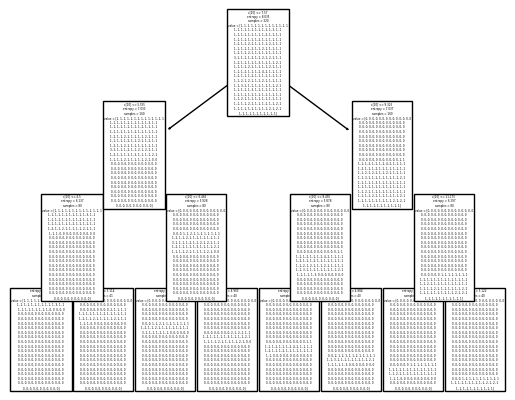

In [223]:
from sklearn import tree
#PLot the decision tree
tree.plot_tree(model);

In [224]:
# Print the feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns
for i in range(len(feature_importances)):
    print(f'{feature_names[i]}: {feature_importances[i]}')

CompPrice: 0.0
Income: 0.0
Advertising: 0.0
Population: 0.0
Price: 0.0
ShelveLoc: 0.0
Age: 0.0
Education: 0.0
Urban_Yes: 0.0
US_Yes: 0.0
Sale: 1.0


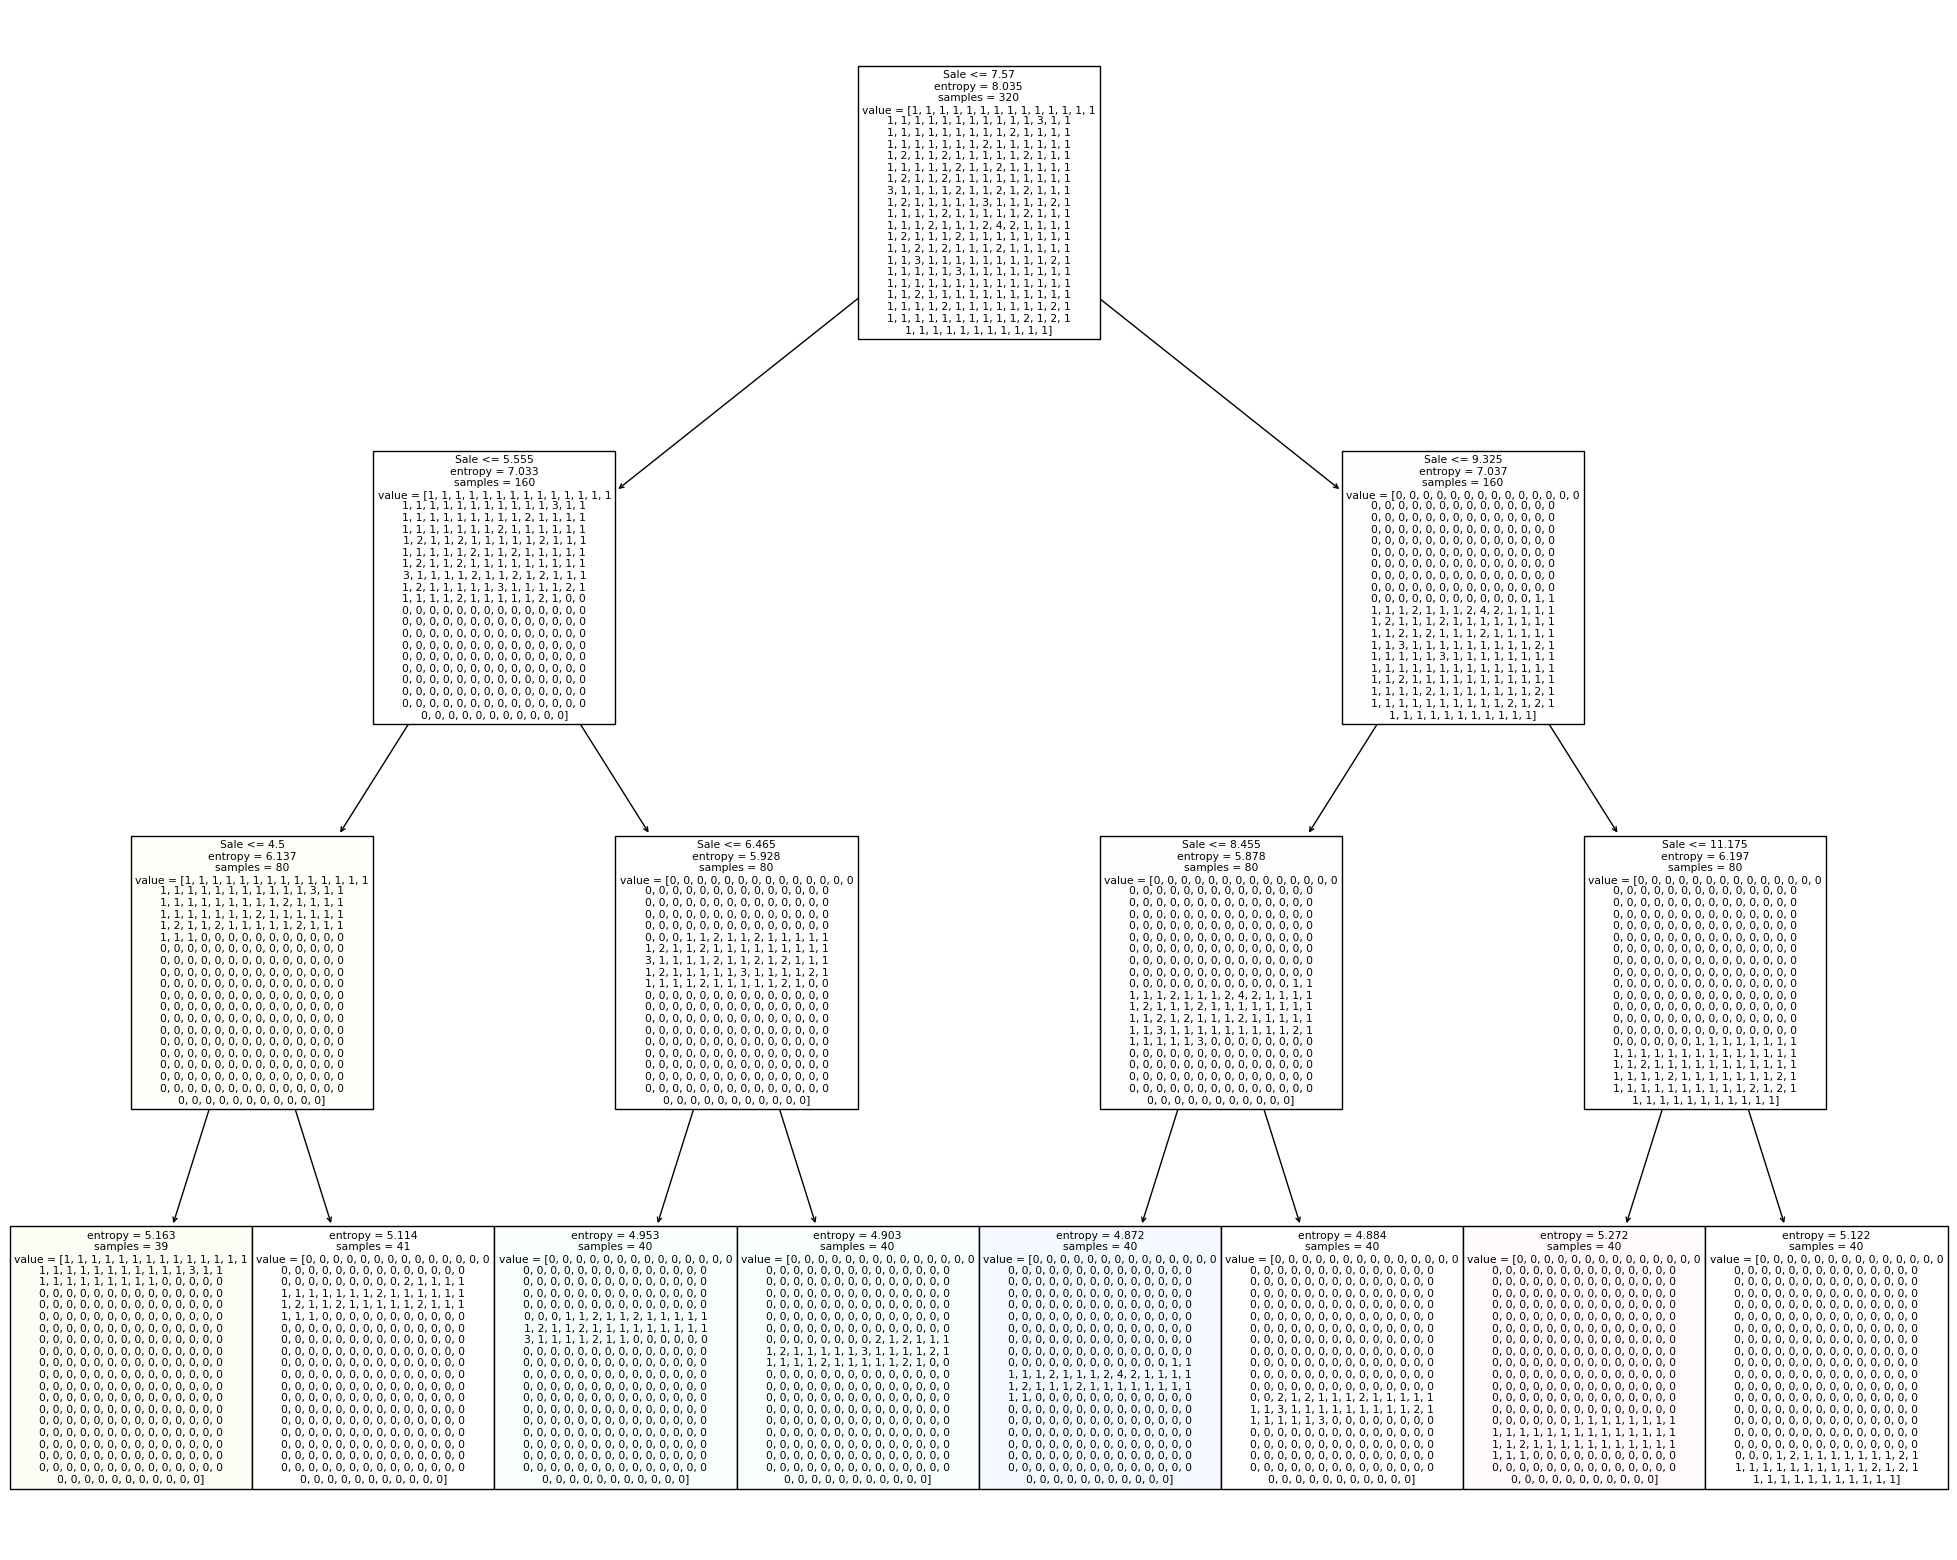

In [225]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))
plot_tree(model, feature_names=feature_names, filled=True)
plt.show()

In [226]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

119    18
25     15
226    12
37     11
242     7
148     7
184     6
98      4
dtype: int64

In [227]:
preds

array([226,  37, 226, 119,  37,  25, 226, 226, 184, 242,  37,  37, 119,
       119, 226,  25,  98, 148,  37,  37, 226, 226, 226, 184,  25,  37,
       148,  25, 242, 242, 242, 119, 242, 119,  25, 242, 184, 119,  98,
       119, 119,  25,  25, 184,  37, 119, 148, 119, 119, 119,  25, 148,
       226, 119,  37, 226, 226, 119,  25,  25,  25,  25, 242, 119,  25,
       148, 119,  25,  98, 226, 148, 184, 119, 119, 148, 184,  25,  98,
        37,  37])

In [228]:
pd.crosstab(y_test,preds)

col_0,25,37,98,119,148,184,226,242
Sales,,,,,,,,
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0
4,4,5,0,0,0,0,0,0
5,0,6,1,0,0,0,0,0
6,0,0,3,8,0,0,0,0
7,0,0,0,10,5,0,0,0
8,0,0,0,0,2,3,0,0


In [229]:
# Accuracy
np.mean(preds==y_test)

0.0